CSV loaded successfully!
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

                       VIDEO_NAME  CLASS  
0  PSY - GANGNAM STYLE(?????) M/V      1  
1  PSY - GANGNAM 

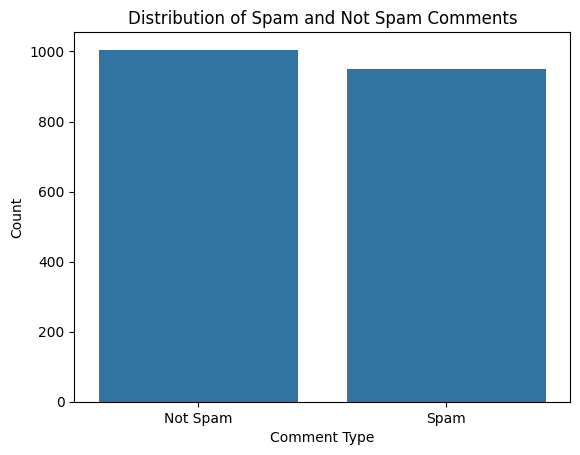


Decision Tree Classifier:
Classification Report:
               precision    recall  f1-score   support

    not spam       0.90      0.92      0.91       176
        spam       0.93      0.92      0.93       216

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.92      0.92      0.92       392

Confusion Matrix:
 [[162  14]
 [ 18 198]]
Accuracy Score: 0.9183673469387755


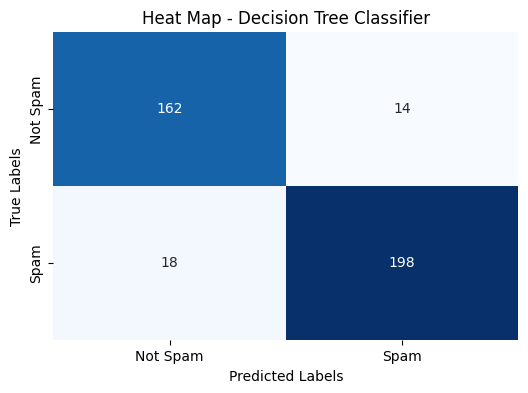


SVM Classifier:
Classification Report:
               precision    recall  f1-score   support

    not spam       0.93      0.98      0.96       176
        spam       0.98      0.94      0.96       216

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392

Confusion Matrix:
 [[172   4]
 [ 12 204]]
Accuracy Score: 0.9591836734693877


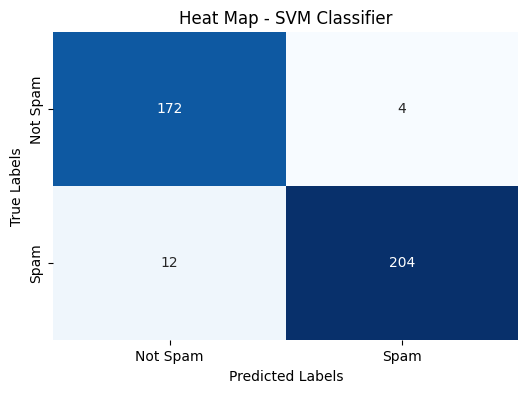


Linear SVC:
Classification Report:
               precision    recall  f1-score   support

    not spam       0.95      0.98      0.96       176
        spam       0.98      0.95      0.97       216

    accuracy                           0.96       392
   macro avg       0.96      0.97      0.96       392
weighted avg       0.96      0.96      0.96       392

Confusion Matrix:
 [[172   4]
 [ 10 206]]
Accuracy Score: 0.9642857142857143


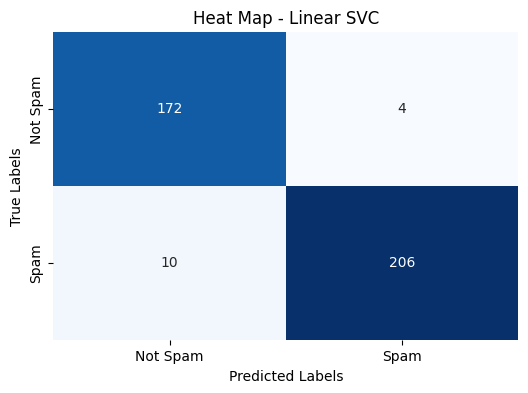

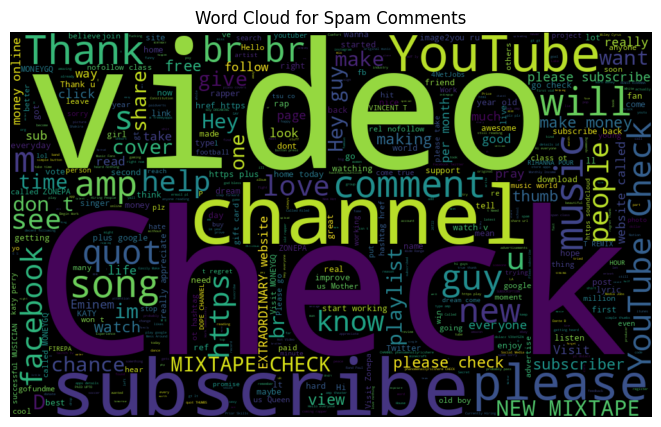

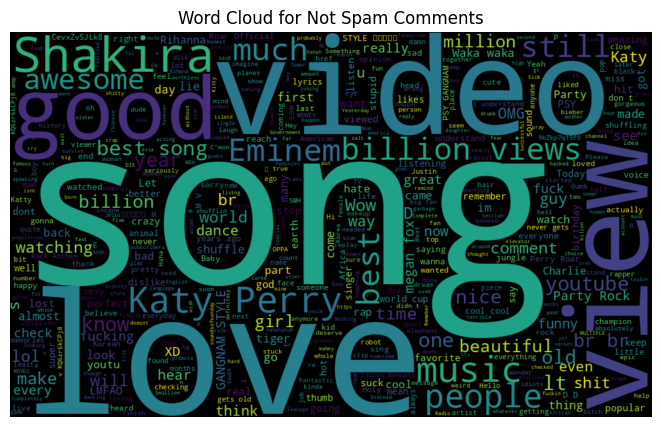

In [7]:
# Importing all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC  # Import SVC for SVM model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

# Loading the data
try:
    df = pd.read_csv("YoutubeSpamDataset.csv")
    print("CSV loaded successfully!")
    # Show the first few rows of the dataset
    print(df.head())

    # Check the columns
    print("Columns in the DataFrame:", df.columns.tolist())

except FileNotFoundError:
    print("CSV file not found. Please check the file path.")

except Exception as e:
    print(f"An error occurred: {e}")

# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Map the class values to 'spam' and 'not spam'
df['CLASS'] = df['CLASS'].map({1: 'spam', 0: 'not spam'})  # Adjust the mapping if necessary

# x-axis labels
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Spam and Not Spam Comments')

# Label for the x-axis
plt.xlabel('Comment Type')

# Label for the y-axis
plt.ylabel('Count')

# Explicitly set x-tick labels
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.show()

# Split into features (X) and target (y)
X = df['CONTENT']
y = df['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform the testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE to balance the classes
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

### Decision Tree Model ###
# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_res, y_train_res)

# Make predictions using Decision Tree
y_pred_dt = dt_clf.predict(X_test_tfidf)

# Evaluate Decision Tree model
print("\nDecision Tree Classifier:")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Classifier")


### SVM Model ###
# Train a SVM Classifier
svm_clf = SVC(kernel='linear', random_state=42)  # Linear kernel is used for SVM
svm_clf.fit(X_train_res, y_train_res)

# Make predictions using SVM
y_pred_svm = svm_clf.predict(X_test_tfidf)

# Evaluate SVM model
print("\nSVM Classifier:")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))

plot_confusion_matrix(y_test, y_pred_svm, "SVM Classifier")


### Linear SVC Model ###
# Train a Linear SVC
svc = LinearSVC(random_state=42)
svc.fit(X_train_res, y_train_res)

# Make predictions using Linear SVC
y_pred_svc = svc.predict(X_test_tfidf)

# Evaluate Linear SVC model
print("\nLinear SVC:")
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Accuracy Score:", accuracy_score(y_test, y_pred_svc))

plot_confusion_matrix(y_test, y_pred_svc, "Linear SVC")

# Generate word cloud for spam comments
spam_comments = df[df['CLASS'] == 'spam']['CONTENT']
spam_wordcloud = WordCloud(width=1000, height=600, max_words=500).generate(' '.join(spam_comments))

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Comments')
plt.show()

# Generate word cloud for nonspam comments
nonspam_comments = df[df['CLASS'] == 'not spam']['CONTENT']
nonspam_wordcloud = WordCloud(width=1000, height=600, max_words=500).generate(' '.join(nonspam_comments))

plt.figure(figsize=(10, 5))
plt.imshow(nonspam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Not Spam Comments')
plt.show()



# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Heat Map - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



